In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
income_pd = pd.read_csv("per capita.csv", encoding='latin')
income_pd.head()

,County-equivalent,State,Per capita income 2008,2012,2016
0,Abbeville,South Carolina,18134.0,"29,202","31,374"
1,Acadia,Louisiana,19910.0,"36,175","33,793"
2,Accomack,Virginia,22703.0,"37,221","39,596"
3,Ada,Idaho,27452.0,"44,392","47,046"
4,Adair,Iowa,25564.0,"43,371","44,765"


In [3]:
us_state_abbrev = {

    'Alabama': 'AL',

    'Alaska': 'AK',

    'Arizona': 'AZ',

    'Arkansas': 'AR',

    'California': 'CA',

    'Colorado': 'CO',

    'Connecticut': 'CT',

    'Delaware': 'DE',

    'Florida': 'FL',

    'Georgia': 'GA',

    'Hawaii': 'HI',

    'Idaho': 'ID',

    'Illinois': 'IL',

    'Indiana': 'IN',

    'Iowa': 'IA',

    'Kansas': 'KS',

    'Kentucky': 'KY',

    'Louisiana': 'LA',

    'Maine': 'ME',

    'Maryland': 'MD',

    'Massachusetts': 'MA',

    'Michigan': 'MI',

    'Minnesota': 'MN',

    'Mississippi': 'MS',

    'Missouri': 'MO',

    'Montana': 'MT',

    'Nebraska': 'NE',

    'Nevada': 'NV',

    'New Hampshire': 'NH',

    'New Jersey': 'NJ',

    'New Mexico': 'NM',

    'New York': 'NY',

    'North Carolina': 'NC',

    'North Dakota': 'ND',

    'Ohio': 'OH',

    'Oklahoma': 'OK',

    'Oregon': 'OR',

    'Pennsylvania': 'PA',

    'Rhode Island': 'RI',

    'South Carolina': 'SC',

    'South Dakota': 'SD',

    'Tennessee': 'TN',

    'Texas': 'TX',

    'Utah': 'UT',

    'Vermont': 'VT',

    'Virginia': 'VA',

    'Washington': 'WA',

    'West Virginia': 'WV',

    'Wisconsin': 'WI',

    'Wyoming': 'WY',
}


In [4]:
income_pd['State Abr'] = income_pd['State'].map(us_state_abbrev)

In [5]:
income_pd['County'] = income_pd['County-equivalent'] + ' County' + ', ' + income_pd['State Abr']
income_pd

,County-equivalent,State,Per capita income 2008,2012,2016,State Abr,County
0,Abbeville,South Carolina,18134.0,"29,202","31,374",SC,"Abbeville County, SC"
1,Acadia,Louisiana,19910.0,"36,175","33,793",LA,"Acadia County, LA"
2,Accomack,Virginia,22703.0,"37,221","39,596",VA,"Accomack County, VA"
3,Ada,Idaho,27452.0,"44,392","47,046",ID,"Ada County, ID"
4,Adair,Iowa,25564.0,"43,371","44,765",IA,"Adair County, IA"
5,Adair,Missouri,19258.0,"25,634","25,994",MO,"Adair County, MO"
6,Adair,Kentucky,17371.0,"29,445","30,177",KY,"Adair County, KY"
7,Adair,Oklahoma,15116.0,"25,910","27,245",OK,"Adair County, OK"
8,Adams,North Dakota,31502.0,"35,824","38,378",ND,"Adams County, ND"
9,Adams,Pennsylvania,27284.0,"34,575","37,301",PA,"Adams County, PA"


In [6]:
del income_pd ['County-equivalent']
del income_pd ['State']
del income_pd ['State Abr']
income_pd = income_pd[['County', 'Per capita income 2008', '2012', '2016']]
income_pd

,County,Per capita income 2008,2012,2016
0,"Abbeville County, SC",18134.0,"29,202","31,374"
1,"Acadia County, LA",19910.0,"36,175","33,793"
2,"Accomack County, VA",22703.0,"37,221","39,596"
3,"Ada County, ID",27452.0,"44,392","47,046"
4,"Adair County, IA",25564.0,"43,371","44,765"
5,"Adair County, MO",19258.0,"25,634","25,994"
6,"Adair County, KY",17371.0,"29,445","30,177"
7,"Adair County, OK",15116.0,"25,910","27,245"
8,"Adams County, ND",31502.0,"35,824","38,378"
9,"Adams County, PA",27284.0,"34,575","37,301"


In [7]:
# Pivotting the data for later merge and comparison
#income_pd = income_pd.pivot(index="County",columns="Per capita income 2008", "2012", "2016")
#income_pd
# Pivotting the data for later merge and comparison
#chris_metric = data3.pivot(index="County",columns="Year",values="Unemployment (%)")
#chris_metric                            

In [8]:
# Reading Counties that flipped to red
source_reader = pd.read_csv("FlippedCounties.csv", encoding='latin')

# Transforming objects to string to remove % sign
source_reader['Trump 2016'] = source_reader["2016"].str.strip('%')
source_reader['Obama 2012'] = source_reader["2012"].str.strip('%')
source_reader['Obama 2008'] = source_reader["2008"].str.strip('%')

# Dropping unneeded columns
source_reader = source_reader.drop(["State","2016","2012","2008"],axis=1)

source_reader


,County,State2,Trump 2016,Obama 2012,Obama 2008
0,Woodruff County,Arkansas,8.91,4.21,7.46
1,Conejos County,Colorado,3.56,9.22,12.93
2,Huerfano County,Colorado,6.61,8.27,11.23
3,Las Animas County,Colorado,15.60,2.65,7.04
4,Pueblo County,Colorado,0.50,13.99,14.97
5,Windham County,Connecticut,7.78,13.28,14.68
6,Kent County,Delaware,4.87,4.94,9.81
7,Jefferson County,Florida,5.06,1.75,3.66
8,Monroe County,Florida,6.82,0.44,4.90
9,Pinellas County,Florida,1.11,5.65,8.25


In [9]:
#States Abbreviation to have the county name in the same format as other data
us_state_abbrev = {

   'Alabama': 'AL',

   'Alaska': 'AK',

   'Arizona': 'AZ',

   'Arkansas': 'AR',

   'California': 'CA',

   'Colorado': 'CO',

   'Connecticut': 'CT',

   'Delaware': 'DE',

   'Florida': 'FL',

   'Georgia': 'GA',

   'Hawaii': 'HI',

   'Idaho': 'ID',

   'Illinois': 'IL',

   'Indiana': 'IN',

   'Iowa': 'IA',

   'Kansas': 'KS',

   'Kentucky': 'KY',

   'Louisiana': 'LA',

   'Maine': 'ME',

   'Maryland': 'MD',

   'Massachusetts': 'MA',

   'Michigan': 'MI',

   'Minnesota': 'MN',

   'Mississippi': 'MS',

   'Missouri': 'MO',

   'Montana': 'MT',

   'Nebraska': 'NE',

   'Nevada': 'NV',

   'New Hampshire': 'NH',

   'New Jersey': 'NJ',

   'New Mexico': 'NM',

   'New York': 'NY',

   'North Carolina': 'NC',

   'North Dakota': 'ND',

   'Ohio': 'OH',

   'Oklahoma': 'OK',

   'Oregon': 'OR',

   'Pennsylvania': 'PA',

   'Rhode Island': 'RI',

   'South Carolina': 'SC',

   'South Dakota': 'SD',

   'Tennessee': 'TN',

   'Texas': 'TX',

   'Utah': 'UT',

   'Vermont': 'VT',

   'Virginia': 'VA',

   'Washington': 'WA',

   'West Virginia': 'WV',

   'Wisconsin': 'WI',

   'Wyoming': 'WY',
}

In [10]:
# Creating new county name that encompasses county name and abbreviated state
source_reader["Abb"]=source_reader["State2"].map(us_state_abbrev)
source_reader["County Name"]= source_reader["County"]+ ", "+ source_reader["Abb"]

# Dropping unneeded columns
dataset1 = source_reader.drop(["County","State2","Abb"],axis=1)
# Transforming County to string
dataset1['County'] = dataset1["County Name"].astype('str')
# Resetting Index
#dataset1=dataset1.set_index("County")
# Dropping County Name
dataset1 = dataset1.drop(["County Name"],axis=1)
# changing votes from string to numeric
dataset1['Trump Margin of votes 2016'] = pd.to_numeric(dataset1['Trump 2016'])
dataset1['Obama Margin of votes 2012'] = pd.to_numeric(dataset1['Obama 2012'])
dataset1['Obama Margin of votes 2008'] = pd.to_numeric(dataset1['Obama 2008'])

dataset1 = dataset1.drop(["Trump 2016","Obama 2012","Obama 2008"],axis=1)

dataset1

,County,Trump Margin of votes 2016,Obama Margin of votes 2012,Obama Margin of votes 2008
0,"Woodruff County, AR",8.91,4.21,7.46
1,"Conejos County, CO",3.56,9.22,12.93
2,"Huerfano County, CO",6.61,8.27,11.23
3,"Las Animas County, CO",15.60,2.65,7.04
4,"Pueblo County, CO",0.50,13.99,14.97
5,"Windham County, CT",7.78,13.28,14.68
6,"Kent County, DE",4.87,4.94,9.81
7,"Jefferson County, FL",5.06,1.75,3.66
8,"Monroe County, FL",6.82,0.44,4.90
9,"Pinellas County, FL",1.11,5.65,8.25


In [11]:
#combined=pd.merge(income_pd, dataset1, left_index= True, right_on ="County", how="right")
#combined=combined.set_index("County")
#combined_df=combined.rename(columns={Per capita income 2008:"Per Capita Income 2008",2012:"Per Capita Income 2012",2016:"Per Capita Income 2016"})
#combined


In [12]:
income_pd.head()

,County,Per capita income 2008,2012,2016
0,"Abbeville County, SC",18134.0,"29,202","31,374"
1,"Acadia County, LA",19910.0,"36,175","33,793"
2,"Accomack County, VA",22703.0,"37,221","39,596"
3,"Ada County, ID",27452.0,"44,392","47,046"
4,"Adair County, IA",25564.0,"43,371","44,765"


In [13]:
dataset1.head()

,County,Trump Margin of votes 2016,Obama Margin of votes 2012,Obama Margin of votes 2008
0,"Woodruff County, AR",8.91,4.21,7.46
1,"Conejos County, CO",3.56,9.22,12.93
2,"Huerfano County, CO",6.61,8.27,11.23
3,"Las Animas County, CO",15.60,2.65,7.04
4,"Pueblo County, CO",0.50,13.99,14.97


In [14]:
combined_df = dataset1.merge(income_pd, left_on = 'County',right_on = 'County', how = 'inner')
#combined_df=pd.merge(dataset1,income_pd,left_on = 'County',right_on = 'County',how='left')
#combined_df.info()
#combined_df.fillna("0,0", inplace=True)
combined_df


,County,Trump Margin of votes 2016,Obama Margin of votes 2012,Obama Margin of votes 2008,Per capita income 2008,2012,2016
0,"Woodruff County, AR",8.91,4.21,7.46,19087.0,"49,089","34,049"
1,"Conejos County, CO",3.56,9.22,12.93,17316.0,"54,427","51,182"
2,"Huerfano County, CO",6.61,8.27,11.23,24058.0,"47,152","49,892"
3,"Las Animas County, CO",15.60,2.65,7.04,22180.0,"44,503","47,117"
4,"Pueblo County, CO",0.50,13.99,14.97,21940.0,"33,775","47,834"
5,"Windham County, CT",7.78,13.28,14.68,27893.0,"50,657","37,673"
6,"Kent County, DE",4.87,4.94,9.81,24851.0,"36,704","38,498"
7,"Jefferson County, FL",5.06,1.75,3.66,21184.0,"37,876","33,711"
8,"Monroe County, FL",6.82,0.44,4.90,33974.0,"29,781","36,461"
9,"Pinellas County, FL",1.11,5.65,8.25,29262.0,"32,098","49,186"


In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 7 columns):
County                        203 non-null object
Trump Margin of votes 2016    203 non-null float64
Obama Margin of votes 2012    203 non-null float64
Obama Margin of votes 2008    203 non-null float64
Per capita income 2008        203 non-null float64
2012                          203 non-null object
2016                          203 non-null object
dtypes: float64(4), object(3)
memory usage: 12.7+ KB


In [16]:
combined_df.info()
combined_df['2012'] = combined_df['2012'].map(lambda x: x.replace(',','')).astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 7 columns):
County                        203 non-null object
Trump Margin of votes 2016    203 non-null float64
Obama Margin of votes 2012    203 non-null float64
Obama Margin of votes 2008    203 non-null float64
Per capita income 2008        203 non-null float64
2012                          203 non-null object
2016                          203 non-null object
dtypes: float64(4), object(3)
memory usage: 12.7+ KB


In [17]:
#combined_df['2012']

In [18]:
#combined_df.info()
combined_df['2016'] = combined_df['2016'].map(lambda x: x.replace(',','')).astype(int)

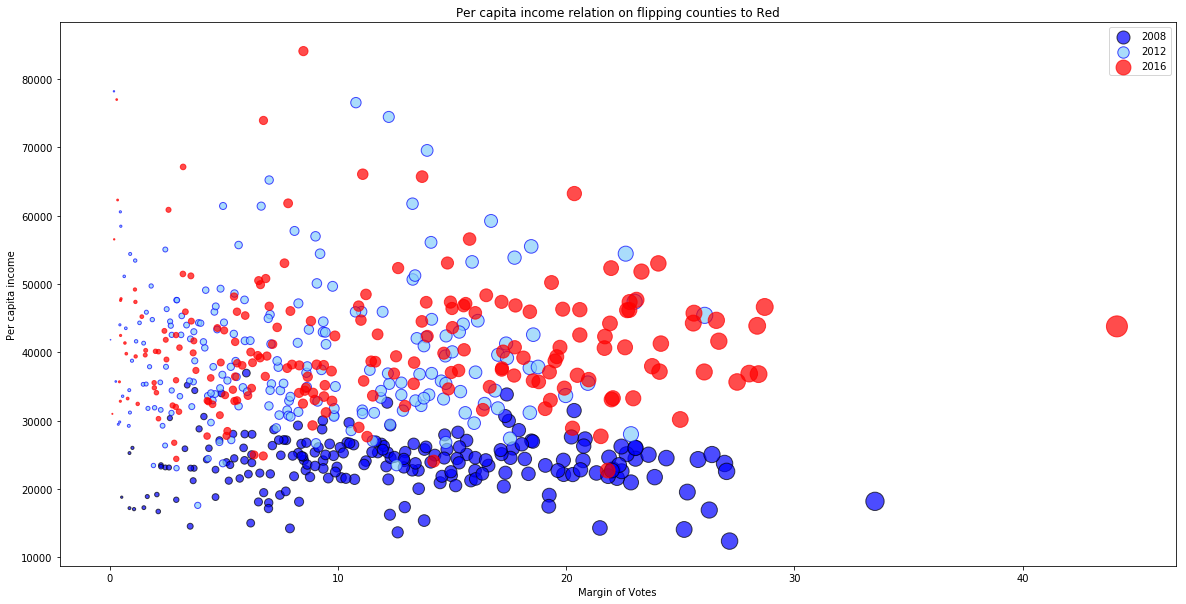

In [19]:
# Create a plot
plt.figure(figsize=(20,10))
plt.scatter(combined_df['Obama Margin of votes 2008'], combined_df['Per capita income 2008'], color='blue', alpha=0.7,
            edgecolors='black', s=10*combined_df['Obama Margin of votes 2008'],label= "2008")
plt.scatter(combined_df['Obama Margin of votes 2012'], combined_df['2012'], color='lightskyblue', alpha=0.7,
            edgecolors='blue',s=10*combined_df['Obama Margin of votes 2012'], label= "2012")
plt.scatter(combined_df['Trump Margin of votes 2016'], combined_df['2016'], color='red', alpha=0.7,
            edgecolors='red', s=10*combined_df['Trump Margin of votes 2016'], label="2016")

plt.title('Per capita income relation on flipping counties to Red')
plt.legend(loc="best")
plt.xlabel('Margin of Votes')
plt.ylabel('Per capita income')

plt.show()

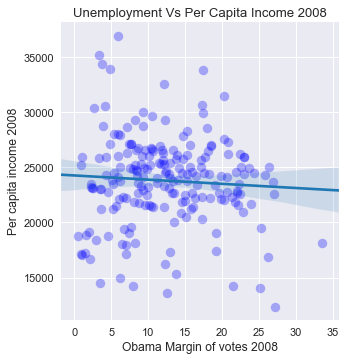

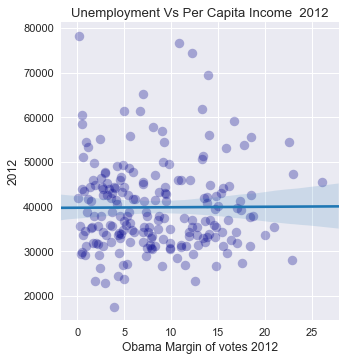

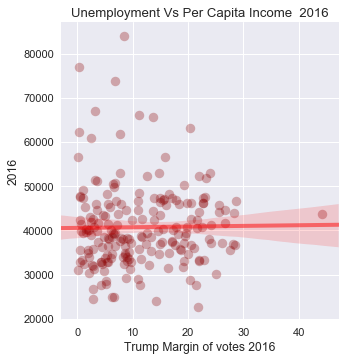

In [20]:
# Set style of scatterplot
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Obama Margin of votes 2008','Per capita income 2008', data=combined_df, fit_reg=True, scatter_kws={"color":"blue","edgecolor":"blue","alpha":0.3,"s":90},
) 
plt.title('Unemployment Vs Per Capita Income 2008')
sns.lmplot('Obama Margin of votes 2012','2012', data=combined_df, fit_reg=True, scatter_kws={"color":"darkblue","alpha":0.3,"s":90},
)
plt.title('Unemployment Vs Per Capita Income  2012')
sns.lmplot('Trump Margin of votes 2016','2016', data=combined_df, fit_reg=True, scatter_kws={"color":"darkred","alpha":0.3,"s":90},line_kws={"color":"red","alpha":0.5,"lw":4
})
plt.title('Unemployment Vs Per Capita Income  2016')
plt.show()

In [30]:
#us_percapit= ".//percapita11.csv"
#us_percapita = pd.read_csv(percapita112.csv, encoding ='latin')
#us_percapita


NameError: name 'percapita112' is not defined

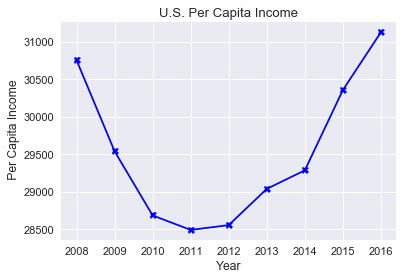

In [25]:
 # Plotting US Per Capita Income
Year=[2008,2009,2010,2011,2012,2013,2014,2015,2016]
Per_Capita_Income=[30755,29542,28687,28494,28558,29041,29288,30358,31128]
us_data, = plt.plot(Year, Per_Capita_Income, color="blue", marker="X", label="US  Per Capita Income" )
plt.title('U.S. Per Capita Income')
plt.xlabel('Year')
plt.ylabel(' Per Capita Income')

plt.show()




In [23]:
#combined_df['2016'] = combined_df['2016'].map(lambda x: x.replace(',','')).astype(int)

AttributeError: 'int' object has no attribute 'replace'

In [32]:
#combined_df[['2016']].mean()

2016    40746.20197
dtype: float64

In [31]:
#income_pd['2016'] = income_pd['2016'].map(lambda x: x.replace(',','')).astype(int)


AttributeError: 'float' object has no attribute 'replace'

In [34]:
#income_pd[['2016']].mean()

Series([], dtype: float64)

In [47]:
#income_pd['2016_mean'] =income_pd.groupby('county')['Per capita income 2008'].transform('mean')
#df['b_mean'] = df.groupby('date')['b'].transform('mean')



SyntaxError: EOL while scanning string literal (<ipython-input-47-e00ca1e83c04>, line 1)